In [1]:
import pandas as pd

In [2]:
data = "customer_conversion_testing_dataset.csv"
df = pd.read_csv(data)
print(df.dtypes)

LeadID                     int64
Age                        int64
Gender                    object
Location                  object
LeadSource                object
TimeSpent (minutes)        int64
PagesViewed                int64
LeadStatus                object
EmailSent                  int64
DeviceType                object
ReferralSource            object
FormSubmissions            int64
Downloads                  int64
CTR_ProductPage          float64
ResponseTime (hours)       int64
FollowUpEmails             int64
SocialMediaEngagement      int64
PaymentHistory            object
Conversion (Target)        int64
dtype: object


In [3]:
df.head(10)

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Lahore,Organic,46,6,Hot,10,Mobile,Facebook,2,3,0.8,11,3,54,Good,0
1,2,27,Male,Lahore,Email,42,8,Warm,6,Tablet,Direct,1,1,0.4,23,2,35,No Payment,0
2,3,21,Male,Sialkot,Email,56,11,Cold,1,Tablet,Direct,5,3,0.5,8,0,34,Good,0
3,4,37,Female,Quetta,Organic,24,15,Cold,6,Tablet,Direct,1,1,0.7,10,3,59,Good,0
4,5,35,Female,Quetta,Email,39,14,Hot,10,Desktop,Direct,1,3,0.5,13,5,35,Good,0
5,6,34,Male,Gujranwala,Referral,56,9,Hot,6,Desktop,ReferralSite,3,3,0.8,15,7,23,No Payment,0
6,7,28,Female,Sialkot,Social Media,17,10,Cold,2,Desktop,Twitter,0,3,0.6,17,2,119,Good,0
7,8,26,Female,Multan,Referral,25,3,Cold,8,Tablet,Twitter,0,3,0.1,13,1,48,No Payment,0
8,9,54,Female,Lahore,Social Media,28,14,Hot,10,Tablet,Google,5,2,0.7,16,3,188,No Payment,0
9,10,25,Female,Peshawar,Referral,17,14,Warm,2,Desktop,Twitter,1,1,0.6,14,2,155,No Payment,0


In [4]:
def null_check(data_frame):
    print(f'Total null values per row: \n{data_frame.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{data_frame.isnull().sum()}\n')

null_check(df)

Total null values per row: 
0        0
1        0
2        0
3        0
4        0
        ..
26140    0
26141    0
26142    0
26143    0
26144    0
Length: 26145, dtype: int64

Total null values per column: 
LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64



In [5]:
def dup_check(data_frame):
    print(f'Duplicates found: {data_frame.duplicated().any()}\n')
    print(f'Number of duplicates: {data_frame.duplicated().sum()}\n')
    
dup_check(df)

Duplicates found: False

Number of duplicates: 0



In [6]:
df.rename(columns={"TimeSpent (minutes)":"TimeSpent"}, inplace=True)

In [7]:
df.rename(columns={"Conversion (Target)":"Conversion"}, inplace=True)

In [8]:
df['ResponseTime'] = df['ResponseTime (hours)'] * 60

# Drop the original 'ResponseTime (hours)' column
df.drop(columns=['ResponseTime (hours)', 'Location', 'ReferralSource', 'LeadStatus', 'LeadID'], inplace=True)

In [9]:
df.head(10)

,Age,Gender,LeadSource,TimeSpent,PagesViewed,EmailSent,DeviceType,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion,ResponseTime
0,60,Female,Organic,46,6,10,Mobile,2,3,0.8,3,54,Good,0,660
1,27,Male,Email,42,8,6,Tablet,1,1,0.4,2,35,No Payment,0,1380
2,21,Male,Email,56,11,1,Tablet,5,3,0.5,0,34,Good,0,480
3,37,Female,Organic,24,15,6,Tablet,1,1,0.7,3,59,Good,0,600
4,35,Female,Email,39,14,10,Desktop,1,3,0.5,5,35,Good,0,780
5,34,Male,Referral,56,9,6,Desktop,3,3,0.8,7,23,No Payment,0,900
6,28,Female,Social Media,17,10,2,Desktop,0,3,0.6,2,119,Good,0,1020
7,26,Female,Referral,25,3,8,Tablet,0,3,0.1,1,48,No Payment,0,780
8,54,Female,Social Media,28,14,10,Tablet,5,2,0.7,3,188,No Payment,0,960
9,25,Female,Referral,17,14,2,Desktop,1,1,0.6,2,155,No Payment,0,840


In [10]:
categoricals = df.select_dtypes(include=[object, bool])
categoricals.head(3)

,Gender,LeadSource,DeviceType,PaymentHistory
0,Female,Organic,Mobile,Good
1,Male,Email,Tablet,No Payment
2,Male,Email,Tablet,Good


In [11]:
numericals = df.select_dtypes(include = 'number')
numericals.head(3)

,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,Conversion,ResponseTime
0,60,46,6,10,2,3,0.8,3,54,0,660
1,27,42,8,6,1,1,0.4,2,35,0,1380
2,21,56,11,1,5,3,0.5,0,34,0,480


In [12]:
ordinals = categoricals[['PaymentHistory']]
ordinals.head(3)

,PaymentHistory
0,Good
1,No Payment
2,Good


In [13]:
ordinals = categoricals['PaymentHistory'].map({'Good':1, 'No Payment':0})

In [14]:
nominals = categoricals.drop(columns=['PaymentHistory'])

In [15]:
nominals.head(3)

,Gender,LeadSource,DeviceType
0,Female,Organic,Mobile
1,Male,Email,Tablet
2,Male,Email,Tablet


In [16]:
#making dunnies from nominals
nominals = pd.get_dummies(nominals, dtype=int)
nominals.head()

,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet
0,1,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1
4,1,0,1,0,0,0,1,0,0


In [17]:
categoricals = pd.concat([ordinals, nominals], axis=1)
categoricals.head()

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet
0,1,1,0,0,1,0,0,0,1,0
1,0,0,1,1,0,0,0,0,0,1
2,1,0,1,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,1
4,1,1,0,1,0,0,0,1,0,0


In [18]:
df = pd.concat([categoricals, numericals], axis=1)

## TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [20]:
#splitting into X and y
X=df.drop(columns=["Conversion"])
y=df[["Conversion"]]

In [21]:
#train and test split
X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=42)

## DOWNSAMPLING

In [22]:
df_train=pd.concat([X_train, y_train], axis=1)
df_train

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,...,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime,Conversion
9162,1,0,1,1,0,0,0,1,0,0,...,44,8,1,2,0,0.3,5,75,780,0
23315,0,1,0,0,0,0,1,1,0,0,...,51,8,4,3,0,0.3,2,92,840,0
16183,0,0,1,0,1,0,0,0,0,1,...,27,12,3,1,2,0.6,2,91,480,0
18368,0,1,0,0,1,0,0,0,1,0,...,34,8,1,3,1,0.2,1,191,960,0
11262,0,1,0,0,1,0,0,1,0,0,...,9,5,10,4,2,0.8,9,190,1380,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1,0,1,0,0,0,1,0,1,0,...,58,12,6,4,3,0.2,7,53,300,0
5390,0,1,0,0,0,0,1,1,0,0,...,55,6,9,4,3,0.8,10,111,1380,0
860,1,0,1,0,0,1,0,1,0,0,...,6,15,6,4,1,0.3,2,163,180,0
15795,0,0,1,1,0,0,0,1,0,0,...,16,15,3,4,1,0.4,9,72,1080,0


In [23]:
#downsampling
category_0 = df_train[df_train['Conversion'] == 0] # negative class (majority)
category_1 = df_train[df_train['Conversion'] == 1] # positive class (minority)

print(category_0['Conversion'].value_counts())
print(category_1['Conversion'].value_counts())

Conversion
0    19295
Name: count, dtype: int64
Conversion
1    313
Name: count, dtype: int64


In [24]:
c1_len=3000
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(3000, 21)
(313, 21)


In [25]:
# reassemble the data
df_train = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
df_train = df_train.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
df_train['Conversion'].value_counts()

Conversion
0    3000
1     313
Name: count, dtype: int64

In [26]:
df_train

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,...,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime,Conversion
18569,0,1,0,0,1,0,0,0,0,1,...,43,14,5,4,1,0.2,9,199,600,0
1711,0,0,1,0,0,0,1,0,1,0,...,33,7,4,2,0,0.6,1,182,1140,0
13435,1,0,1,0,1,0,0,0,1,0,...,56,8,3,4,0,0.1,1,48,120,0
58,0,1,0,1,0,0,0,0,0,1,...,19,12,5,4,2,0.5,4,128,1020,0
8302,0,1,0,0,0,0,1,1,0,0,...,48,14,1,4,1,0.1,7,119,960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,0,1,0,0,0,0,1,0,0,1,...,16,11,3,2,0,0.7,6,199,900,0
10995,1,0,1,0,1,0,0,0,0,1,...,8,13,4,2,0,0.7,5,159,600,0
19884,1,0,1,0,1,0,0,0,1,0,...,7,3,6,4,1,0.6,10,81,60,0
25492,1,1,0,0,0,1,0,1,0,0,...,41,8,7,2,0,0.8,1,162,1380,0


In [27]:
X_train=df_train.drop(columns=["Conversion"])
y_train=df_train[["Conversion"]]

## UPSAMPLE USING SMOTE

In [28]:
# Upsampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Conversion
0             3000
1             3000
Name: count, dtype: int64

## SCALING

In [30]:
#scaling
pt=PowerTransformer()
pt.fit(X_train)
X_train_pt=pt.transform(X_train_sm)
X_test_pt=pt.transform(X_test)

## LOGISTICS REGRESSION

In [31]:
#fitting LOGISTICS REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_model = LogisticRegression() # weights to be added if we want to avoid fall negative or fall positive
log_model.fit(X_train_pt, y_train_sm)

# predicting data
y_pred_train = log_model.predict(X_train_pt)
y_pred_test = log_model.predict(X_test_pt)


#results
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train),
                                         precision_score(y_train_sm, y_pred_train),
                                         recall_score(y_train_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.932833,0.943399
1,Precision,0.959646,0.093373
2,Recall,0.903667,0.310000


## TRAIN SET CONFUSION MATRIX

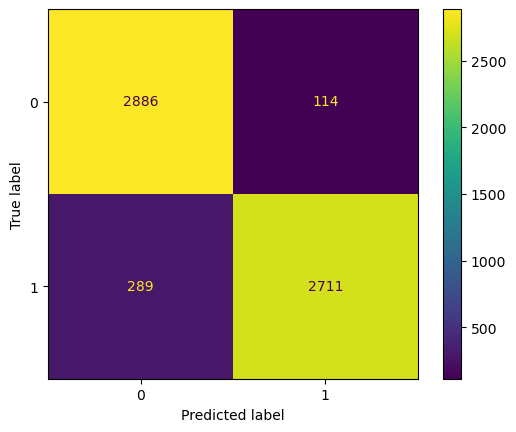

In [32]:
cm_train = confusion_matrix(y_train_sm, y_pred_train, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

## TEST SET CONFUSION MATRIX

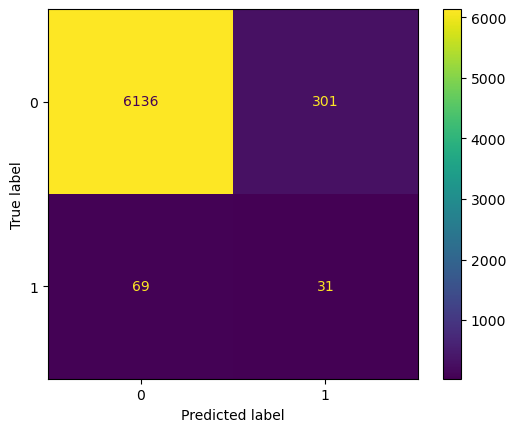

In [33]:
cm_train = confusion_matrix(y_test, y_pred_test, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

## Feature selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import DataConversionWarning

# Filter out DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

accuracy = {}  # Dictionary to store best accuracies
precision = {} # Dictionary to store best precision
recall={} # Dictionary to store best recalls

# Iterate over different numbers of selected features
for num_features in range(10, 21):  # Considering up to 10 features
    
    selector = RFE(log_model, n_features_to_select=num_features, step=1, verbose=1)
    selector.fit(X_train_pt, y_train_sm)
    
    weights = {0: 1, 1: 5}
    log_model = LogisticRegression(class_weight=weights)
    
    # Transforming the data
    X_train_RFE = selector.transform(X_train_pt)
    X_test_RFE = selector.transform(X_test_pt)
    
    # Fitting the model
    log_model.fit(X_train_RFE, y_train_sm)
    
    # Predicting and calculating R2 score
    y_pred_test= log_model.predict(X_test_RFE)
    acc=accuracy_score(y_test, y_pred_test)
    rec=recall_score(y_test, y_pred_test)
    prec=precision_score(y_test, y_pred_test)
    
    # Store the best R2 score for each number of selected features
    accuracy[num_features] = acc
    precision[num_features]=prec
    recall[num_features]=rec

# Print the best R2 score for each number of selected features
for num_features, acc in accuracy.items():
    prec = precision[num_features]
    rec = recall[num_features]
    print(f"Number of Features: {num_features}, Accuracy: {acc}, Precision: {prec}, Recall: {rec}")

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 20 fe

### best decision according to RFE is keeping all 20 features
#### Accuracy: 0.8179593085513233, Precision: 0.06814580031695722, Recall: 0.86

## LASSO AND RIDGE

In [35]:
# Lasso
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength via the alpha parameter
lasso_model.fit(X_train_sm, y_train_sm)

# Select features based on Lasso coefficients
selected_features = SelectFromModel(lasso_model, prefit=True).transform(X_train_sm)

selected_features

NameError: name 'SelectFromModel' is not defined